# Regresión Logística y Softmax

En este _Notebook_ vamos a aprender a utilizar el modelo de Regresión Logística y Regresión _Softmax_ de Scikit Learn. Para esto, vamos a volver a utilizar el _dataset_ de las flores Iris. 

## Regresión Logística

Lo primero que haremos será predecir si una flor es _Iris Virginica_ solamente en base al ancho de su pétalo. Para esto primero cargamos el _dataset_.

In [3]:
import numpy as np
from sklearn import datasets

iris = datasets.load_iris()
X = iris['data'][:, 3:] # Nos quedamos solamente con el ancho del pétalo
y = (iris['target'] == 2).astype(np.int) # Dejamos True en las filas que son Virginica

Ahora vamos a importar el modelo y lo vamos a entrenar.

In [4]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

Ahora vamos a graficar cómo se comporta este modelo para distintos tamaños de pétalo.

/usr/local/lib/python3.9/site-packages/matplotlib/patches.py:1387: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  verts = np.dot(coords, M) + (x + dx, y + dy)


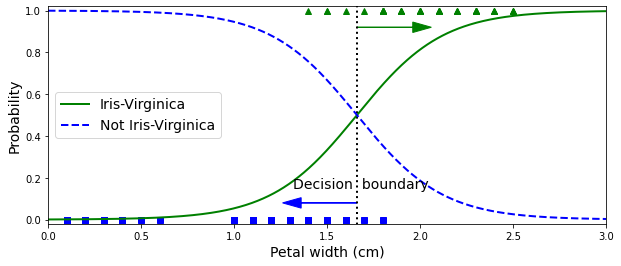

In [5]:
import matplotlib.pyplot as plt

X_new = np.linspace(0, 3, 1000).reshape(-1, 1) # Creamos mil valores entre el 0 y el 3 que representarán anchos de pétalo
y_proba = log_reg.predict_proba(X_new) # Predecimos para todos esos valores, pero obtenemos la probabilidad.
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0] # Buscamos el valor de X donde la probabilidad se hace >= a 0.5

plt.figure(figsize=(10, 4))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
plt.show()

Los cuadrados azules son anchos de pétalo de flores que no son _Iris Virginica_, mientras que los triángulos verde son anchos para flores _Iris Virginica_. Vemos que a partir del ancho 1.6 aproximadamente el modelo comienza a predecir que una flor sí es _Iris_virginica_. Ahora vamos a ver un ejemplo para predecir dos anchos.

In [6]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

Ahora vamos a repetir el procedimiento, pero nuestras _features_ van a ser el largo y el ancho del pétalo.

In [7]:
X = iris["data"][:, (2, 3)]  # Largo del pétalo, ancho del pétalo
y = (iris["target"] == 2).astype(np.int)

log_reg = LogisticRegression(penalty='none')
log_reg.fit(X, y)

LogisticRegression(penalty='none')

Lo primero que haremos será graficar ambas _features_ en un plano 2D. Para esto, en vez de usar `matplotlib` vamos a usar `seaborn`. `seaborn` es una librería para realizar visualiaciones que utilza a `matplotlib` por debajo, pero tiene la ventaja de trabajar nativamente con DataFrames, por lo que podemos hacer hartas cosas de forma mucho más fácil. Partamos haciendo un DataFrame con nuestros datos.

In [12]:
import pandas as pd

# Creamos un DataFrame con los datos
df = pd.DataFrame(X)
df.columns = ['Largo del Pétalo', 'Ancho del Pétalo']
df['Es Virginica'] = y
df

,Largo del Pétalo,Ancho del Pétalo,Es Virginica
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
...,...,...,...
145,5.2,2.3,1
146,5.0,1.9,1
147,5.2,2.0,1
148,5.4,2.3,1


Ahora hacemos el gráfico.

<AxesSubplot:xlabel='Largo del Pétalo', ylabel='Ancho del Pétalo'>

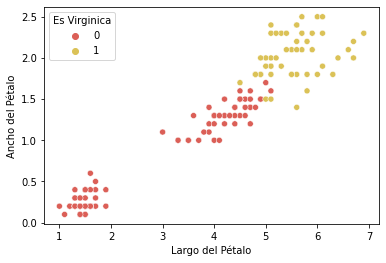

In [19]:
import seaborn as sns

# Tomamos una paleta de 8 colores
palette = sns.color_palette("hls", 8)

# Pasamos el DataFrame, indicamos que queremos en cada eje, y la forma de pintar los puntos
# Los colores son los dos primeros dos de la paleta
sns.scatterplot(data=df, x="Largo del Pétalo", y="Ancho del Pétalo", hue="Es Virginica", palette=palette[0:2])

Ahora vamos a utilizar `log_reg` para predecir sobre todos los puntos del plano. Luego vamos a pintar la frontera de decisión.

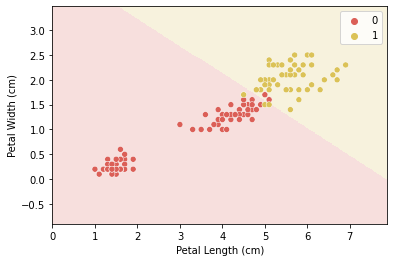

In [23]:
from matplotlib.colors import ListedColormap

# Pasamos la paleta a Hexadecimal
# Para el fondo necesitamos que sea un Colormap
palete_hex = palette.as_hex()
palette_back = ListedColormap(palete_hex[0:2])

# Límites del gráfico
# Buscamos los límites del gráfico
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# Generamos las combinaciones de x/y del plano en los rangos
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Generamos las predicciones
predictions = log_reg.predict(np.c_[xx.ravel(), yy.ravel()])

# Resultado de la frontera de decisión con color claro
Z = predictions.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=palette_back, shading='auto', alpha=0.2)
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')

sns.scatterplot(data=df, x="Largo del Pétalo", y="Ancho del Pétalo", hue="Es Virginica", palette=palette[0:2])

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.legend()

plt.show()

Notemos que el _scatter plot_ está hecho en `seaborn`, pero lo demás son funciones de `matplotlib`. Uno de los 
beneficios de `seaborn`, es que al estar hecho sobre `matplotlib`, podemos mezclar código de ambas librerías. Ahora hagamos un segundo gráfico que nos muestra cuan seguro está nuestro modelo sobre su respuesta.

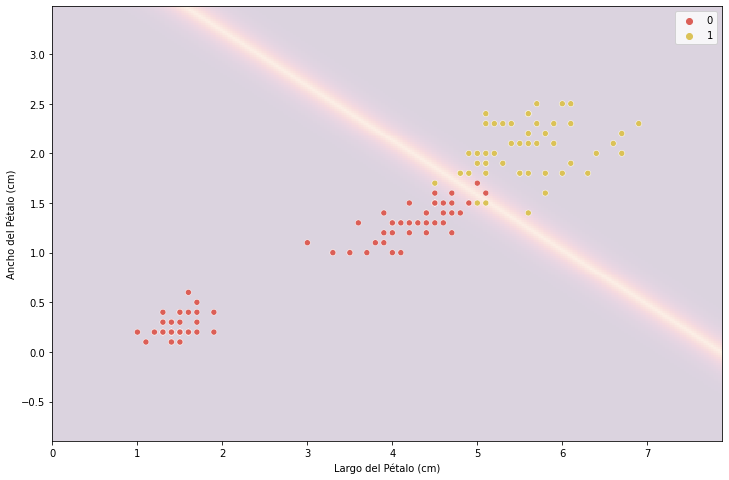

In [33]:
# Ajustamos el tamaño
plt.rcParams["figure.figsize"]=(12, 8)

pallete_back = sns.color_palette("flare", as_cmap=True)

proba = log_reg.predict_proba(np.c_[xx.ravel(), yy.ravel()])

scores = np.array([max(i) for i in proba])

# Resultado de la frontera de decisión con color claro
Z = scores.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=pallete_back, shading='auto', alpha=0.2)
plt.xlabel('Largo del Pétalo (cm)')
plt.ylabel('Ancho del Pétalo (cm)')

sns.scatterplot(data=df, x="Largo del Pétalo", y="Ancho del Pétalo", hue="Es Virginica", palette=palette[0:2])

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.legend()

plt.show()

Aquí podemos ver que mientras más cerca de la frontera, más dudas tiene el modelo de su decisión.

## Regresión Softmax

Ahora en vez de decir si una flor es o no _Iris Virginica_, vamos a decir que tipo de flor es. Para esto usaremos el modelo de regresión _Softmax_.

In [35]:
X = iris['data'][:, (2, 3)] # Largo y ancho del pétalo
y = iris["target"]

# Si no agregamos multinomial hará One-versus-the-rest con modelos de regresión logística
softmax_reg = LogisticRegression(multi_class='multinomial')
softmax_reg.fit(X, y)

LogisticRegression(multi_class='multinomial')

Ahora si queremos hacer una predicción, podemos ejecutar el siguiente código.

In [36]:
softmax_reg.predict([[5, 2]])

array([2])

Finalmente, mostremos la frontera de decisión de este modelo.

In [38]:
# Creamos de nuevo el DataFrame
import pandas as pd

# Creamos un DataFrame con los datos
df = pd.DataFrame(X)
df.columns = ['Largo del Pétalo', 'Ancho del Pétalo']
df['Es Virginica'] = y
df

,Largo del Pétalo,Ancho del Pétalo,Es Virginica
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
...,...,...,...
145,5.2,2.3,2
146,5.0,1.9,2
147,5.2,2.0,2
148,5.4,2.3,2


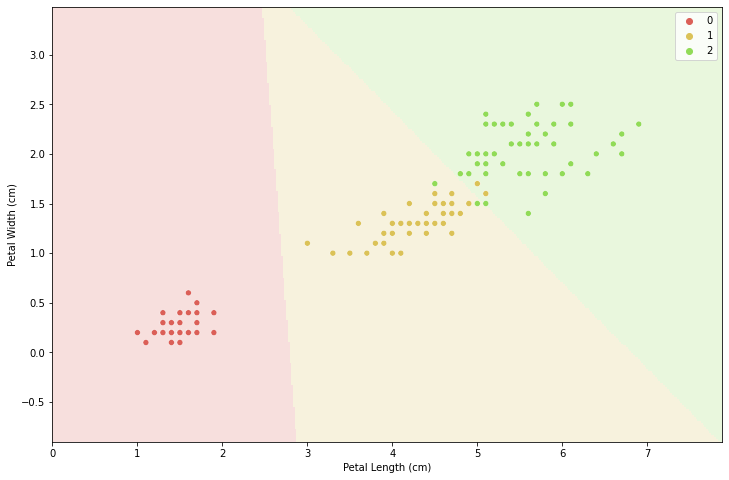

In [39]:
from matplotlib.colors import ListedColormap

# Pasamos la paleta a Hexadecimal
# Para el fondo necesitamos que sea un Colormap
palete_hex = palette.as_hex()
palette_back = ListedColormap(palete_hex[0:3])

# Límites del gráfico
# Buscamos los límites del gráfico
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# Generamos las combinaciones de x/y del plano en los rangos
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Generamos las predicciones
predictions = softmax_reg.predict(np.c_[xx.ravel(), yy.ravel()])

# Resultado de la frontera de decisión con color claro
Z = predictions.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=palette_back, shading='auto', alpha=0.2)
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')

sns.scatterplot(data=df, x="Largo del Pétalo", y="Ancho del Pétalo", hue="Es Virginica", palette=palette[0:3])

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.legend()

plt.show()

Y ahora vemos cuan seguro está el modelo con su decisión.

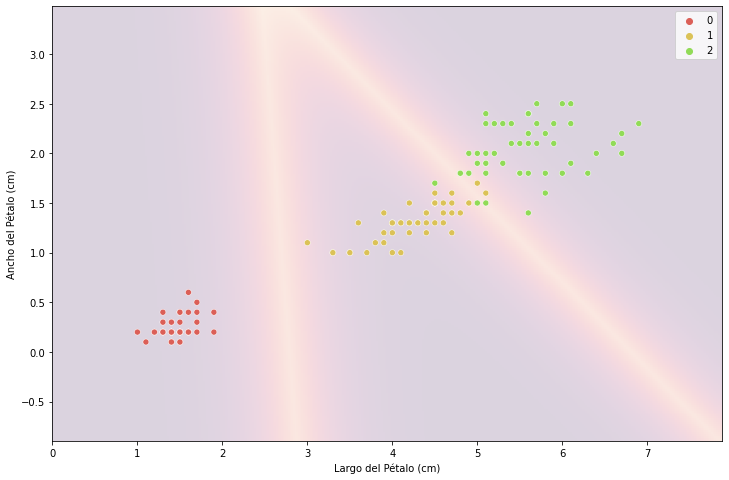

In [41]:
# Ajustamos el tamaño
plt.rcParams["figure.figsize"]=(12, 8)

pallete_back = sns.color_palette("flare", as_cmap=True)

proba = softmax_reg.predict_proba(np.c_[xx.ravel(), yy.ravel()])

scores = np.array([max(i) for i in proba])

# Resultado de la frontera de decisión con color claro
Z = scores.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=pallete_back, shading='auto', alpha=0.2)
plt.xlabel('Largo del Pétalo (cm)')
plt.ylabel('Ancho del Pétalo (cm)')

sns.scatterplot(data=df, x="Largo del Pétalo", y="Ancho del Pétalo", hue="Es Virginica", palette=palette[0:3])

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.legend()

plt.show()